In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pickle
from mutation import *
from crossover import *
from rmp import *
from mfea import *
from task import *
from llm import *
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# load_dotenv()

# GPT_API_KEY = os.getenv("GPT_API_KEY")

# llm = GPTModel(GPT_API_KEY, "gpt-3.5-turbo-0125", 0.7)

In [7]:
cec2017_tasks = get_10_tasks()

In [ ]:
num_indis_per_task = 100
indi_len = 50
mutation = PolynomialMutation(5, 1.0 / indi_len)
crossover = SBXCrossover(mutation, eta=2)
# crossover = BLXCrossover()
# rmp = AdaptiveRMPMatrix(rmp_pop_size=5, num_gen=5, pc=0.8, pm=0.1)
rmp = NormalRMP(0.3)

np.random.seed(0)
amfea = AMFEA(num_indis_per_task, indi_len, cec2017_tasks, crossover, mutation, rmp)

Initialization:
Task 0:
Best Fitness: 125473.96699307997
Mean Fitness: 166392.121167927

Task 1:
Best Fitness: 319204.0909081603
Mean Fitness: 503987.30720511527

Task 2:
Best Fitness: 346653.31463481847
Mean Fitness: 486737.256905658

Task 3:
Best Fitness: 41.0604113392313
Mean Fitness: 49.714217403069476

Task 4:
Best Fitness: 4058761661.357497
Mean Fitness: 6371677088.876898

Task 5:
Best Fitness: 21.482750101043788
Mean Fitness: 21.715487176250566

Task 6:
Best Fitness: 86.24595513767974
Mean Fitness: 99.8559653446189

Task 7:
Best Fitness: 18243.689210172182
Mean Fitness: 21153.768897608556

Task 8:
Best Fitness: 74.8950497645563
Mean Fitness: 122.64795239117853

Task 9:
Best Fitness: 88658.75615256254
Mean Fitness: 124389.07711105635



In [16]:
bfs, mfs = amfea.fit(num_gen=1000, monitor=True, monitor_rate=10, llm_rate=50)

Gen 0
Evaluation count: 0
Task 0, Best: 112505.7097993851, Avg: 148774.03789026022
Task 1, Best: 299057.54804782924, Avg: 433935.8334209777
Task 2, Best: 307076.39147335844, Avg: 406006.20903400227
Task 3, Best: 40.73618676275238, Avg: 45.80432637669148
Task 4, Best: 2437439329.3493104, Avg: 4996337522.622132
Task 5, Best: 21.369716923731943, Avg: 21.57687142658662
Task 6, Best: 82.15150236655356, Avg: 93.75800003507615
Task 7, Best: 17420.061256879562, Avg: 19723.346838077607
Task 8, Best: 74.8950497645563, Avg: 102.28248077108839
Task 9, Best: 76076.1168226418, Avg: 106402.52301181928
Time taken each gen: 0.1699 seconds

Gen 10
Evaluation count: 0
Task 0, Best: 94331.81176138364, Avg: 110520.93217969374
Task 1, Best: 234302.0416866158, Avg: 261629.83721584055
Task 2, Best: 265082.57255402295, Avg: 296302.9208728893
Task 3, Best: 34.739032805510355, Avg: 37.376400309740504
Task 4, Best: 2060530022.7146478, Avg: 3064692661.778548
Task 5, Best: 21.074604508426432, Avg: 21.14259720254086

KeyboardInterrupt: 

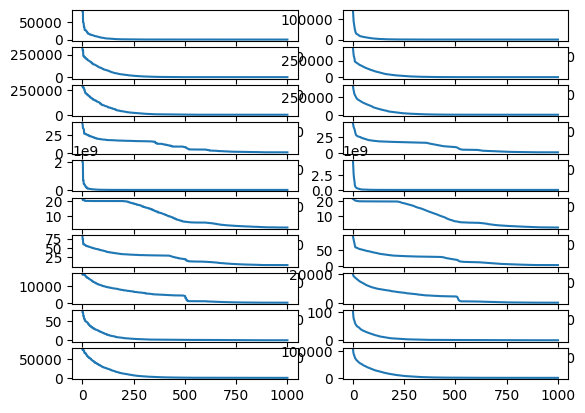

In [ ]:
num_tasks = len(cec2017_tasks)
fig, axes = plt.subplots(num_tasks, 2)

for i in range(num_tasks):
    axes[i][0].plot(bfs[i])
    axes[i][1].plot(mfs[i])